<a href="https://colab.research.google.com/github/nneguss1/DATA-690-WANG/blob/master/Assignment_08/Data690_Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Import necessary libraries

In [3]:
# <1> 
# Import libraries

#(Write code here)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import fnmatch
import re
import random

# 2 - Retrieve the names of the 22 files and assign them to a List variable. You would need to filter out other files and display the names of these 22 files.

In [4]:
use_columns = ['INSTNM','TUITIONFEE_IN']

In [5]:
path = '/content/drive/My Drive/Colab Notebooks'
data_files = os.listdir(path)
# List of files in complete directory
file_list = []
 
for path, folders, files in os.walk(path):
    for file in files:
        if fnmatch.fnmatch(file, '*MERGED*'):
            file_list.append(os.path.join(path, file))
 
# Loop to print each filename separately
#for filename in file_list:
#   print(filename)
print(file_list)
np.size(file_list)


['/content/drive/My Drive/Colab Notebooks/MERGED1996_97_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1997_98_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1998_99_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1999_00_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2000_01_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2001_02_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2002_03_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2003_04_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2004_05_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2005_06_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2006_07_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2007_08_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2008_09_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2009_10_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2010_11_PP.csv', '/content/drive/My Drive/Colab Notebook

23

# 3 - Write code to randomly select one file name out of the 22 files names.Hint: generate a random integer between 0 and 21 first. Display the file name.

In [8]:
file_name = random.choice(file_list)
print(file_name)

/content/drive/My Drive/Colab Notebooks/MERGED2006_07_PP.csv


# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN") from this file into a data frame aand display use info() function to display a summary information.

In [10]:
DF_rand = pd.read_csv(file_name, usecols= use_columns)
DF_rand.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,3640.0
2,University of Alabama at Birmingham,4792.0
3,Amridge University,6000.0
4,University of Alabama in Huntsville,4848.0


# 5 - Find out how many observations have missing value.

In [11]:
DF_rand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6951 non-null   object 
 1   TUITIONFEE_IN  4201 non-null   float64
dtypes: float64(1), object(1)
memory usage: 108.7+ KB



# 6 - 8 - Drop those observations with missing value .Disaply the number of observations afterward. Find out how many observations have 0 tution. Drop those observations with 0 tuition. Disaply the number of observations afterward.

In [12]:
DF_rand = DF_rand.dropna()
DF_rand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201 entries, 1 to 6945
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4201 non-null   object 
 1   TUITIONFEE_IN  4201 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.5+ KB


In [13]:
DF_rand.head(5)

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,3640.0
2,University of Alabama at Birmingham,4792.0
3,Amridge University,6000.0
4,University of Alabama in Huntsville,4848.0
5,Alabama State University,4008.0


In [14]:
DF_rand.describe()

,TUITIONFEE_IN
count,4201.000000
mean,10115.045941
std,8161.240987
min,0.000000
25%,3190.000000
50%,8277.000000
75%,14880.000000
max,44865.000000


In [15]:
DF_new = DF_rand[DF_rand.TUITIONFEE_IN != 0]
DF_new.describe()

,TUITIONFEE_IN
count,4196.000000
mean,10127.099142
std,8158.624185
min,430.000000
25%,3206.000000
50%,8300.000000
75%,14880.000000
max,44865.000000


In [16]:
DF_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 1 to 6945
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4196 non-null   object 
 1   TUITIONFEE_IN  4196 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.3+ KB


# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations.

In [17]:
DF_mean = DF_new["TUITIONFEE_IN"].mean()
DF_mean

10127.099142040039

# 10 - Randomly select just 1 observation from the data frame. Display the tuition of that observation.

In [18]:
col_one_list = DF_new['TUITIONFEE_IN'].tolist()
random_choice = random.choice(col_one_list)
random_choice

9620.0

# 11 - Calculate the different between the tuition of this observation and the mean tuition off all observations calculated earlier. Display the difference.

In [19]:
diff_1 = random_choice - DF_mean
diff_1

-507.0991420400387

# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means.

In [20]:
diff_2 = random.choice(col_one_list)- DF_mean
diff_2

77.90085795996129

In [21]:
diff_3 = random.choice(col_one_list)- DF_mean
diff_3

6095.900857959961

In [22]:
diff_4 = random.choice(col_one_list)- DF_mean
diff_4

14022.900857959961

In [23]:
diff_5 = random.choice(col_one_list)- DF_mean
diff_5

-3527.0991420400387

In [24]:
diff_6 = random.choice(col_one_list)- DF_mean
diff_6

3028.9008579599613

In [25]:
diff_7 = random.choice(col_one_list)- DF_mean
diff_7

2046.9008579599613

In [26]:
diff_8 = random.choice(col_one_list)- DF_mean
diff_8

-3017.0991420400387

In [27]:
diff_9 = random.choice(col_one_list)- DF_mean
diff_9

3072.9008579599613

In [28]:
diff_10 = random.choice(col_one_list)- DF_mean
diff_10

-5547.099142040039

# 13 - Randomly select 20 observations, display the tuition of these observation.

In [29]:
UpdatedList = random.sample(col_one_list, 20)
UpdatedList

[1425.0,
 2700.0,
 10935.0,
 7325.0,
 13644.0,
 921.0,
 7469.0,
 4050.0,
 6522.0,
 1920.0,
 4182.0,
 8140.0,
 11650.0,
 2713.0,
 10140.0,
 5439.0,
 2205.0,
 13970.0,
 26220.0,
 9850.0]

# 14 - Calculate and displat the mean tuition of these 20 observations.

In [30]:
Updated_Mean = np.mean(UpdatedList)
Updated_Mean

7571.0

# 15 - Calculate  the different between the average tuition of these 20 observations and the mean tuition off all observations calculated earlier. Display the difference.

In [31]:
Updated_diff = UpdatedList - Updated_Mean
Updated_diff

array([-6146., -4871.,  3364.,  -246.,  6073., -6650.,  -102., -3521.,
       -1049., -5651., -3389.,   569.,  4079., -4858.,  2569., -2132.,
       -5366.,  6399., 18649.,  2279.])

# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means. Compare these differences with the differences calculated earlier with just 1 observation. Describe your hunch/conclusion.

*Since we are only comparing individual values, the difference between individual sample values and the population mean will vary largly. This shows that the data has a very large variance and can be noted from the general data description and the mean.*

# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes"; display it to make sure its members are from 1 to 50.

In [42]:
sample_size =list(range(1,51))
sample_size

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means; Loop through the list sample_sizes. For each element in the sample size list obtain a random sample of that size from the data frame.Calculate the sample mean and calculate the difference between the population mean and the sample mean. Append the difference to the list "means_diff". Display the list "means_diff" after the loop is completed.

In [44]:
means_diff= []
for i in range(len(sample_size)):
  sample_rand = random.sample(col_one_list, sample_size[i])
  sample_mean = np.mean(sample_rand)
  mean_difference = DF_mean-sample_mean

  means_diff.append(mean_difference)

print(means_diff)

[7952.099142040039, 1398.5991420400387, -1064.2341912932952, -3691.4008579599613, -5717.900857959961, 6994.599142040039, -3430.9008579599613, -4536.525857959961, -2573.234191293295, 2459.5991420400387, 68.64459658549276, -1218.9841912932952, 748.4068343477302, 1683.5991420400387, 1677.8324753733723, 203.1616420400387, 150.5109067459216, 651.5991420400387, 97.25703677688034, 2149.2991420400385, 796.0991420400387, -277.62813068723335, 1873.5774029096046, -196.56752462662735, -582.6208579599606, -1048.7854733445765, 35.099142040038714, 1310.3848563257525, -1390.418099339271, 1666.6658087067062, -860.7073095728647, 1760.2241420400387, -1135.9311609902652, -865.4890932540784, 1119.813427754325, 620.1546975955935, 1099.342385283282, -2352.4271737494346, -2731.977781036885, 688.024142040038, 2476.0747517961363, 185.69438013527724, 928.8433280865502, 611.6445965854928, -1857.3675246266284, -128.20520578604737, -436.98596434294086, -529.3383579599613, 969.7317951012628, -1166.3608579599604]


# 21 - Make a scatter plot with sample size on the x-axs and mean difference on the y-axis. Observe as the sample size increases the sample means converge to the population mean. Make sure you make the plot large enough.

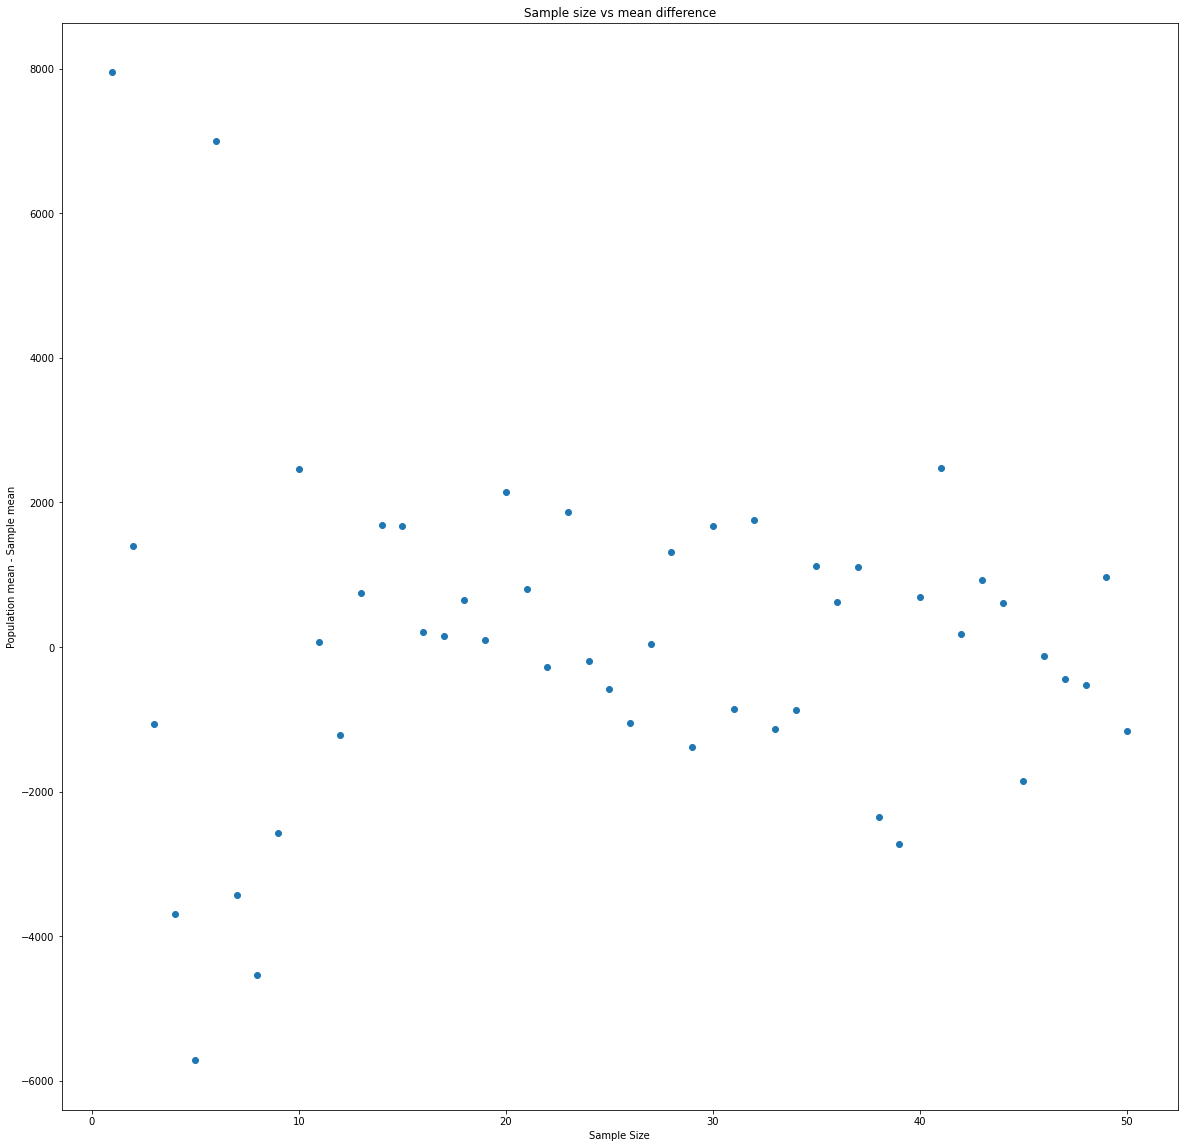

In [49]:
plt.figure(figsize=(20,20))
plt.scatter(sample_size, means_diff)
plt.title("Sample size vs mean difference")

plt.xlabel("Sample Size")
plt.ylabel("Population mean - Sample mean")
plt.show()

# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000 and see how the plot looks.

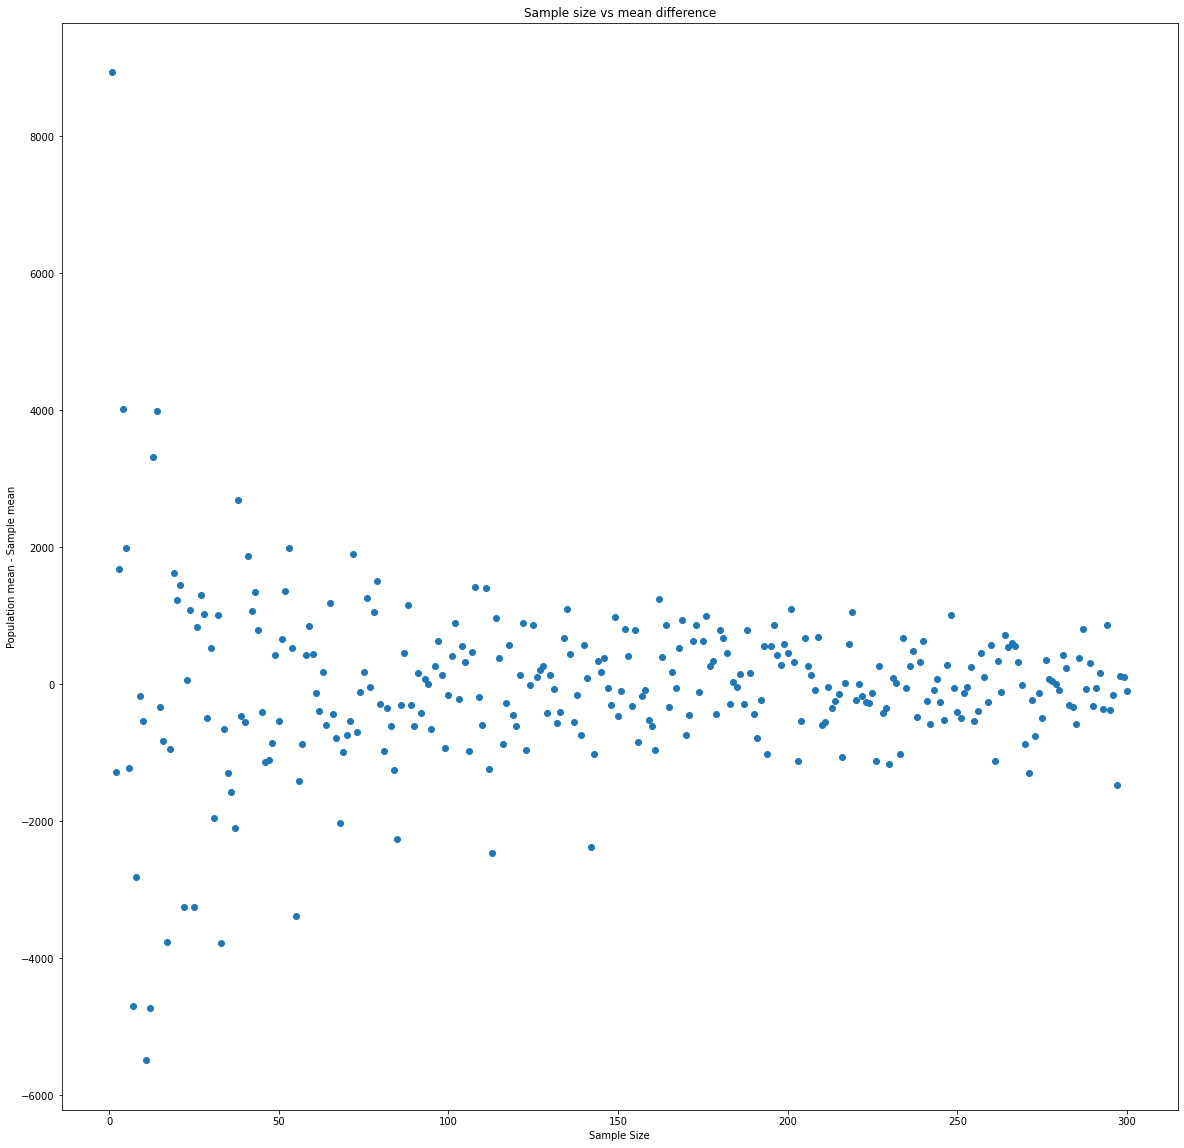

In [50]:
sample_size300 =list(range(1,301))
means_diff300= []
for i in range(len(sample_size300)):
  sample_rand300 = random.sample(col_one_list, sample_size300[i])
  sample_mean300 = np.mean(sample_rand300)
  mean_difference300 = DF_mean-sample_mean300

  means_diff300.append(mean_difference300)


plt.figure(figsize=(20,20))
plt.scatter(sample_size300, means_diff300)
plt.title("Sample size vs mean difference")

plt.xlabel("Sample Size")
plt.ylabel("Population mean - Sample mean")
plt.show()

*As we can verify from the plots, when we increase the sample size, our sample mean is approaching the population mean. The scatter plot of the difference shows that as we have more samples, the difference will be nearing 0.*